This notebook processes the UV-vis data from 9/8/24 (Batch 5) of Spincoated P3HT in DCB on PDMS.
There are two samples (S5 and S6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_polarized_UVvis(_df, bw=None, ylim=(0,1.05),title="", plot_transmittance = False):
    # Set up figure with 3 subplots for polarized and unpolarized UV-vis data
    fig, axs = plt.subplots(3, 1, figsize=(8, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if plot_transmittance:
        for i, column in enumerate([col for col in _df.columns if 'Wavelength' not in col]):
            print(column)
            _df[column] = AtoT(_df[column].values)
        _df
    # Generate colors for plotting
    colors = cm.Spectral([i / ((_df.shape[1] - 3)//3) for i in range((_df.shape[1] - 1)//3)])
    # Plot Vertical Absorbance (columns with 'H' wichic are parrallel to strain)
    for i, column in enumerate([col for col in _df.columns if 'H' in col and 'baseline' not in col]):
        axs[0].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    axs[0].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ||-polarized light')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[0].set_xlim(bw)
    axs[0].set_ylim(ylim)
    axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Horizontal Absorbance (columns with 'V' which are perp to strain)
    for i, column in enumerate([col for col in _df.columns if 'V' in col and 'baseline' not in col]):
        axs[1].plot(_df['Wavelength'],_df[column], label=column, color=colors[i])

    axs[1].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for ⊥-polarized light')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[1].set_xlim(bw)
    axs[1].set_ylim(ylim)
    axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot Unpolarized Absorbance (columns without 'H' or 'V')
    for i, column in enumerate([col for col in _df.columns if 'H' not in col and 'V' not in col and 'Wavelength' not in col and 'baseline' not in col]):
        axs[2].plot(_df['Wavelength'], _df[column], label=column, color=colors[i])

    axs[2].set_title(f'{'Transmittance' if plot_transmittance else 'Absorbance'} vs. Wavelength for Unpolarized light')
    axs[2].set_xlabel('Wavelength (nm)')
    axs[2].set_ylabel(f'{'Transmittance' if plot_transmittance else 'Absorbance'}')
    axs[2].set_xlim(bw)
    axs[2].set_ylim(ylim)
    axs[2].legend(title='Unpolarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    
    return fig,axs
    
    # plt.show()


In [2]:
def TtoA(T):
    return -np.log10(T) 
    
def AtoT(A):
    return 10**(-A)

In [3]:

# Load the CSV file into a pandas DataFrame, with metadata
material_str='P3HT'

file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 5 Raw Data.csv'; s_num = 5; date_str = "2024-09-08"; method_str="spincoated"
# file_path = 'Carlos_P3HT_9-8-24/Batch 5 Samples - Sample 6 Raw Data.csv'; s_num = 6; date_str = "2024-09-08"; method_str="spincoated"

raw_df = pd.read_csv(file_path)

#load baseline data for polaizer
h_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Horizontal.csv"
v_file = "baselines/Polarized Batch 4 0% Samples  - Baseline Vertical.csv"

df_h = pd.read_csv(h_file)
df_v = pd.read_csv(v_file)

#add baseleine to df
raw_df['V_baseline'] = df_v['Average']
raw_df['H_baseline'] = df_h['Average']

raw_df

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,...,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,4.000000,4.000000,0.394925,4.000000,4.000000,0.413223,4.000000,4.000000,...,4.000000,4.000000,0.388122,4.000000,3.983489,0.389276,4.000000,4.000000,4.000000,4.000000
1,300.5,0.431662,4.000000,4.000000,0.392923,3.970814,4.000000,0.411178,4.000000,4.000000,...,4.000000,4.000000,0.386125,3.994737,3.994713,0.387221,4.000000,4.000000,3.973701,4.000000
2,301.0,0.429235,4.000000,4.000000,0.390655,3.994535,4.000000,0.408850,3.988463,4.000000,...,4.000000,4.000000,0.384006,4.000000,3.910665,0.385221,4.000000,4.000000,3.994414,3.992867
3,301.5,0.426603,3.988345,3.970443,0.388120,3.994535,4.000000,0.406354,4.000000,3.967144,...,3.961568,4.000000,0.382072,4.000000,3.947889,0.382982,4.000000,4.000000,3.980757,3.989014
4,302.0,0.423869,4.000000,3.957882,0.385657,4.000000,3.982980,0.403841,4.000000,4.000000,...,4.000000,4.000000,0.379584,4.000000,4.000000,0.380788,4.000000,4.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.186523,0.278575,0.106130,0.177678,0.269270,0.109067,0.181073,0.272261,...,0.179332,0.270136,0.106552,0.179977,0.269247,0.107526,0.181269,0.270606,0.165349,0.072880
1197,898.5,0.114585,0.186335,0.276814,0.106129,0.177485,0.267559,0.109018,0.180786,0.270555,...,0.178956,0.268486,0.106583,0.179411,0.267587,0.107543,0.180684,0.269052,0.163506,0.072257
1198,899.0,0.114699,0.185847,0.275167,0.106262,0.176976,0.266026,0.109107,0.180272,0.269082,...,0.178480,0.267099,0.106671,0.179022,0.266326,0.107642,0.180425,0.267970,0.161557,0.071873
1199,899.5,0.114711,0.185530,0.273863,0.106296,0.176663,0.264913,0.109118,0.180015,0.268090,...,0.178187,0.266163,0.106599,0.178752,0.265403,0.107643,0.180003,0.266969,0.159992,0.071622


Saved figure to Carlos_P3HT_9-8-24/Raw_Polarized_UVvis_S6_spincoated_P3HT_2024-09-08.pdf


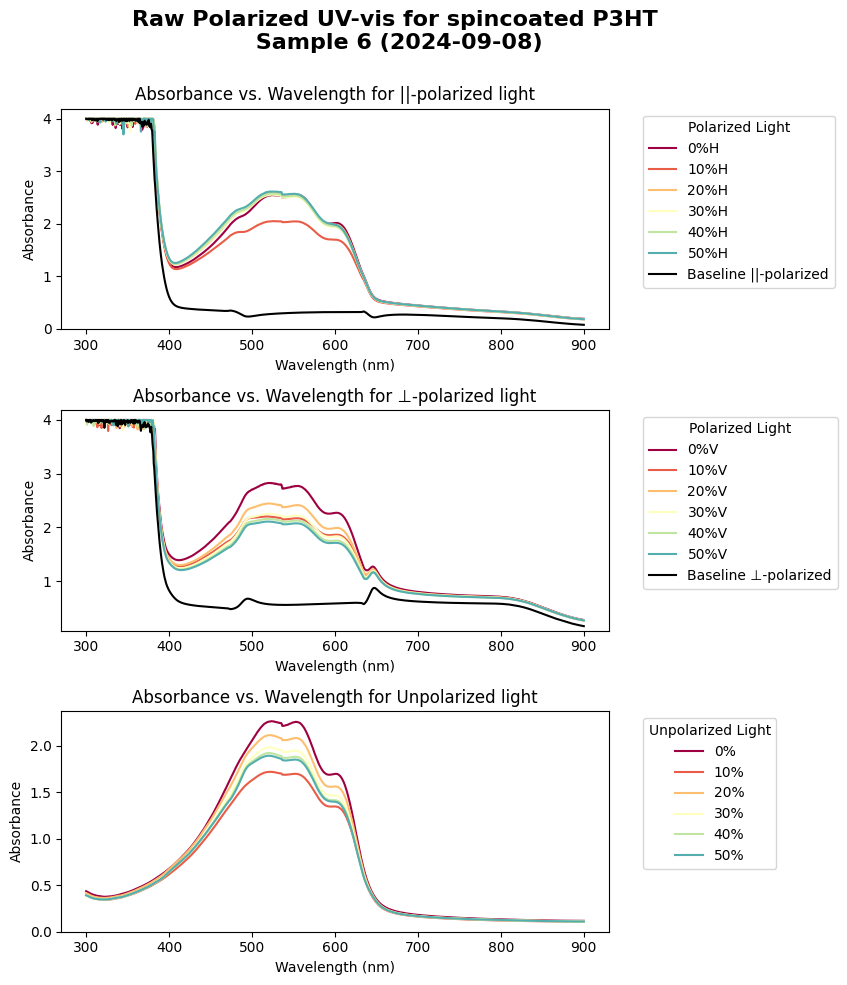

In [4]:
##### plotting the raw data #####
fig,axs = plot_polarized_UVvis(raw_df, bw=None, ylim=(None),title=f'Raw Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n')
axs[0].plot(raw_df['Wavelength'], raw_df['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(raw_df['Wavelength'], raw_df['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')

save_str = f"Carlos_P3HT_9-8-24/Raw_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [5]:
#### baseline correction ####
# formula = r"$A_{\text{corrected}} = A_{\text{raw}} - A_{\text{baseline}}$"

df_corrected = raw_df.copy()
for i, column in enumerate([col for col in df_corrected.columns if 'H' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['H_baseline'].values

for i, column in enumerate([col for col in df_corrected.columns if 'V' in col and 'baseline' not in col]):
    df_corrected[column] = raw_df[column].values - raw_df['V_baseline'].values

df_corrected

,Wavelength,0%,0%H,0%V,10%,10%H,10%V,20%,20%H,20%V,...,30%H,30%V,40%,40%H,40%V,50%,50%H,50%V,V_baseline,H_baseline
0,300.0,0.433788,0.000000,0.000000,0.394925,0.000000,0.000000,0.413223,0.000000,0.000000,...,0.000000,0.000000,0.388122,0.000000,-0.016511,0.389276,0.000000,0.000000,4.000000,4.000000
1,300.5,0.431662,0.000000,0.026299,0.392923,-0.029186,0.026299,0.411178,0.000000,0.026299,...,0.000000,0.026299,0.386125,-0.005263,0.021012,0.387221,0.000000,0.026299,3.973701,4.000000
2,301.0,0.429235,0.007133,0.005586,0.390655,0.001668,0.005586,0.408850,-0.004404,0.005586,...,0.007133,0.005586,0.384006,0.007133,-0.083749,0.385221,0.007133,0.005586,3.994414,3.992867
3,301.5,0.426603,-0.000669,-0.010314,0.388120,0.005521,0.019243,0.406354,0.010986,-0.013613,...,-0.027446,0.019243,0.382072,0.010986,-0.032868,0.382982,0.010986,0.019243,3.980757,3.989014
4,302.0,0.423869,0.007216,-0.042118,0.385657,0.007216,-0.017020,0.403841,0.007216,0.000000,...,0.007216,0.000000,0.379584,0.007216,0.000000,0.380788,0.007216,0.000000,4.000000,3.992784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,898.0,0.114587,0.113643,0.113226,0.106130,0.104798,0.103921,0.109067,0.108193,0.106912,...,0.106452,0.104787,0.106552,0.107097,0.103898,0.107526,0.108389,0.105257,0.165349,0.072880
1197,898.5,0.114585,0.114078,0.113308,0.106129,0.105228,0.104053,0.109018,0.108529,0.107049,...,0.106699,0.104980,0.106583,0.107154,0.104081,0.107543,0.108427,0.105546,0.163506,0.072257
1198,899.0,0.114699,0.113974,0.113610,0.106262,0.105103,0.104469,0.109107,0.108399,0.107525,...,0.106607,0.105542,0.106671,0.107149,0.104769,0.107642,0.108552,0.106413,0.161557,0.071873
1199,899.5,0.114711,0.113908,0.113871,0.106296,0.105041,0.104921,0.109118,0.108393,0.108098,...,0.106565,0.106171,0.106599,0.107130,0.105411,0.107643,0.108381,0.106977,0.159992,0.071622


Saved figure to Carlos_P3HT_9-8-24/Corrected_Polarized_UVvis_S6_spincoated_P3HT_2024-09-08.pdf


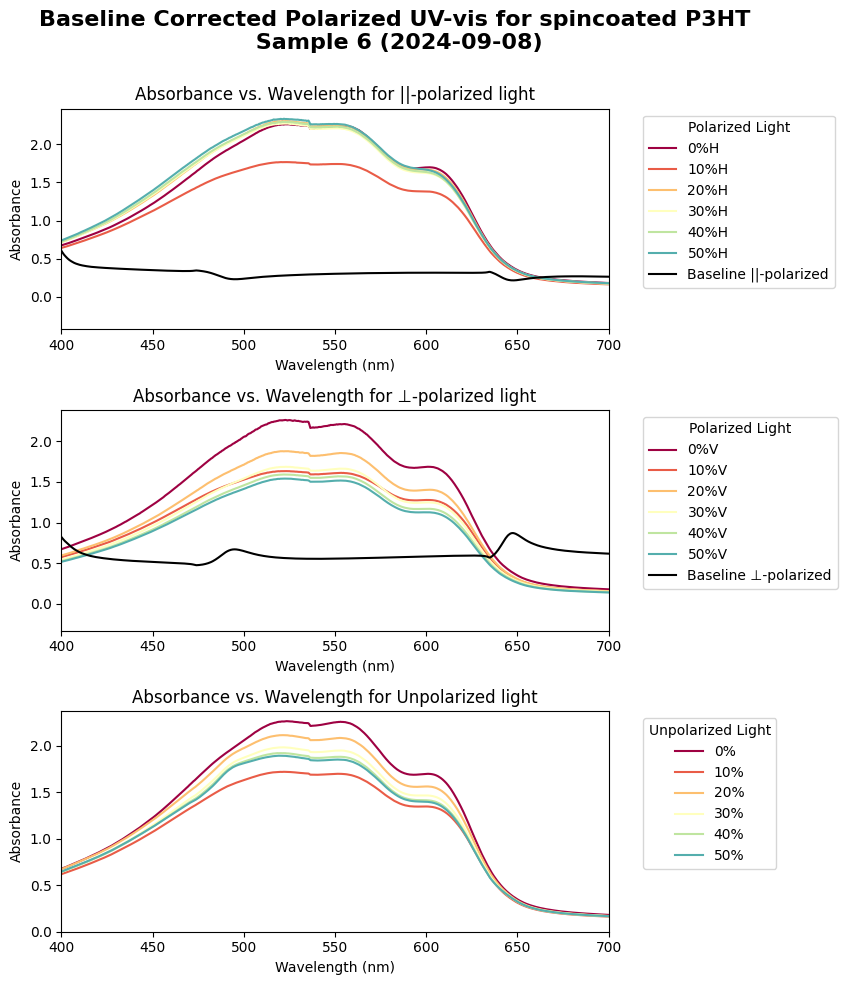

In [6]:
##### plotting final corected #####
fig,axs = plot_polarized_UVvis(df_corrected, title=f'Baseline Corrected Polarized UV-vis for {method_str} {material_str}\n Sample {s_num} ({date_str})\n', bw=(400,700), ylim = None, plot_transmittance=False)
# axs[0].text(0.75, 0.9, formula, fontsize=12, ha='center', va='center', transform=axs[0].transAxes)

#plot overides
axs[0].plot(df_corrected['Wavelength'], df_corrected['H_baseline'], label="Baseline ||-polarized", color='k')
axs[1].plot(df_corrected['Wavelength'], df_corrected['V_baseline'], label="Baseline ⊥-polarized", color='k')
axs[0].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(title='Polarized Light', bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[2].set_ylim((.4,.8))

save_str = f"Carlos_P3HT_9-8-24/Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.pdf"
fig.savefig(save_str, format='pdf')
print(f"Saved figure to {save_str}")

In [7]:
#Save corrected data
data_save_str = f"Carlos_P3HT_9-8-24/Corrected_Polarized_UVvis_S{s_num}_{method_str}_P3HT_{date_str}.csv"
df_corrected.to_csv(data_save_str, index=False)
